In [229]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)
from matplotlib import font_manager
font_manager.fontManager.addfont('/cluster/groups/Wangxiaonan/share/yingjun/arial.ttf')
plt.rcParams['font.sans-serif'] = 'Arial'

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.24.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.8


# Calculate pathways mean and compare their trends

In [2]:
Adult_Mice = sc.read('./Final_write/mouse_mac_final.h5ad')

In [142]:
Zebrafish = sc.read('./Final_write/ZF_mac_final.h5ad')

In [132]:
samp = 'Zebrafish'
with open(f'./Final_Files/gobp_{samp}.gmt') as f:
    DBcont2 = f.readlines()
    
if samp=='Zebrafish':
    DBcont2 = [x.split('\tNA')[0] for x in DBcont2]
    DBcont2 = [x+'\tcol19a1.1' for x in DBcont2] # Add random one that doesn't express

In [143]:
adata = eval(samp)

temp = adata.raw 
del adata.raw
import anndata
# adata.raw = anndata.AnnData(X=temp.X.toarray(), var=temp.var, obs=adata.obs)
adata.raw = anndata.AnnData(X=temp.X.A, var=temp.var, obs=adata.obs)
del temp

In [145]:
scoreBiomarker = smqpp.pathway_score_cal(adata, DBcont2)
scoreBiomarker = anndata.AnnData(scoreBiomarker, obs=adata.obs, var=pd.DataFrame(scoreBiomarker.columns, index=scoreBiomarker.columns), obsm=adata.obsm)

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [152]:
scoreBiomarker.shape

(25856, 7790)

In [147]:
del(scoreBiomarker.var[0])

In [148]:
scoreBiomarker.write(f'Final_write/Pathways/{samp}_BM.h5ad')

In [81]:
#BM_Zebrafish_hs = sc.read('./Final_write/Pathways/Zebrafish_BM_hs.h5ad')
#BM_Adult_Mice_zfhs = BM_Adult_Mice[:,np.intersect1d(BM_Adult_Mice.var_names,BM_Zebrafish.var_names)]

In [153]:
BM_Zebrafish = scoreBiomarker

In [ ]:
group='Day'
sc.tl.rank_genes_groups(scoreBiomarker, group, n_genes=scoreBiomarker.shape[1], key_added=f'DE_{group}') 

## Stats

In [154]:
samp = 'Zebrafish'
BM = eval(f'BM_{samp}')

In [155]:
group='Day'
counts = pd.DataFrame(BM.X,index=BM.obs_names,columns=BM.var_names)
counts[group] = BM.obs[group]
means = counts.groupby(group).agg('mean')
means.T.to_csv(f'./Final_Files/{samp}_Day_BM_agg.csv')
del(counts)

In [156]:
means.T

Day,0,2,3,7,14,30
GOBP_10_FORMYLTETRAHYDROFOLATE_METABOLIC_PROCESS,0.007582,0.012643,0.016772,0.013810,0.004864,0.010045
GOBP_2FE_2S_CLUSTER_ASSEMBLY,0.070508,0.090374,0.074186,0.094589,0.062724,0.081700
GOBP_2_OXOGLUTARATE_METABOLIC_PROCESS,0.061394,0.080884,0.084968,0.081684,0.056451,0.061130
GOBP_3_PHOSPHOADENOSINE_5_PHOSPHOSULFATE_METABOLIC_PROCESS,0.037629,0.069551,0.050871,0.045083,0.042688,0.027015
GOBP_3_UTR_MEDIATED_MRNA_DESTABILIZATION,0.070151,0.081380,0.063492,0.065277,0.067007,0.050300
...,...,...,...,...,...,...
GOBP_ZINC_ION_IMPORT_INTO_ORGANELLE,0.099115,0.093726,0.125756,0.110610,0.043245,0.116746
GOBP_ZINC_ION_TRANSPORT,0.055307,0.050102,0.076784,0.059609,0.025275,0.066756
GOBP_ZYGOTIC_DETERMINATION_OF_ANTERIOR_POSTERIOR_AXIS_EMBRYO,0.000331,0.001440,0.000065,0.000730,0.000000,0.000172
GOBP_ZYMOGEN_ACTIVATION,0.113409,0.141369,0.140909,0.115953,0.083836,0.104090


In [157]:
BM_Day = anndata.AnnData(X=means.T)

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


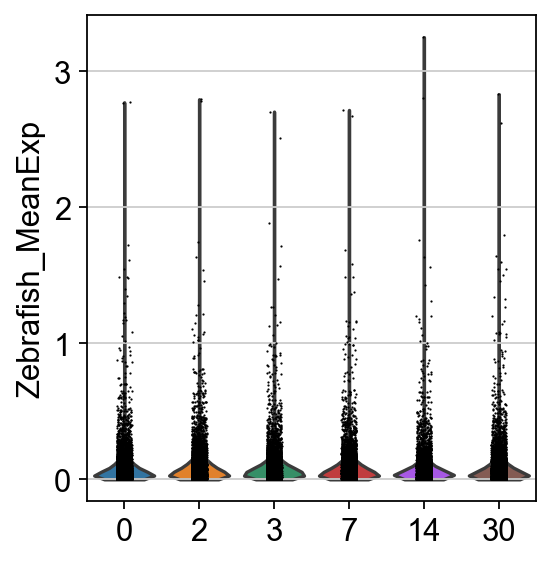

In [158]:
sc.pl.violin(BM_Day,keys=BM_Day.var_names,ylabel=f'{samp}_MeanExp')

# Pathways for Zebrafish ct_self

In [181]:
samp = 'Adult_Mice'
BM = eval(f'BM_{samp}')

In [184]:
BM.obs['Day'] = BM.obs['Day'].astype('category')

In [185]:
db='gobp'
groupby='Day'
adataA = BM

sc.tl.rank_genes_groups(adataA,groupby=groupby,key_added=f'DE_{groupby}')
df = pd.DataFrame(adataA.uns[f'DE_{groupby}']['names']).head(100)
df.to_excel(f'./Final_Files/{samp}_DE_{db}_{groupby}.xlsx')


ranking genes
    finished: added to `.uns['DE_Day']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


In [179]:
BM_Zebrafish.write('./Final_write/Pathways/Zebrafish_BM.h5ad')

In [186]:
BM_Adult_Mice.write('./Final_write/Pathways/Adult_Mice_BM.h5ad')

## Ranked Dotplot

In [ ]:
samp = 'Adult_Mice'
sampname = 'mouse' if samp=='Adult_Mice' else 'ZF'
adataA = eval('BM_'+samp)

groupby='Day'
groups = None
groupname = groups[0] if groups!=None else ''
keygroup = 'Day'
key = f'DE_{keygroup}'
#breakgroup = 'FinalCT'
#breaks2 = [x*2 for x in list(range(1,len(adataA.obs[breakgroup].cat.categories)))]
n_genes = 10

fig = sc.pl.rank_genes_groups_dotplot(adataA,key=key,dendrogram=False,title=f'{samp}_DEGs',return_fig = True,
                 groups=groups,groupby=groupby,standard_scale='var',swap_axes=True,n_genes=n_genes)
#fig.add_totals()
ax = fig.get_axes()['mainplot_ax']
#pltlen = 1 if groups!=None else len(adataA.obs[breakgroup].cat.categories)
#ax.vlines(breaks2,0,n_genes*pltlen,linestyles='--')

plt.savefig(f'./figures/DEG_{samp}_BM{groupname}_{key}.pdf',bbox_inches='tight')

# Customed Dotplots

## Define lists

In [257]:
df1 = pd.read_excel('./Final_Files/Zebrafish_DE_gobp_CT_self.xlsx',index_col=0)

In [214]:
df2 = pd.read_excel('./Final_Files/Zebrafish_DE_t-test_CT_self.xlsx',index_col=0)

In [263]:
CM_duplex_ZF = {'CM_duplex':df1['CM duplex'][0:10].values}

In [275]:
CM_duplex_ZF['CM_duplex'] = [x.split('GOBP_')[1].capitalize() for x in CM_duplex_ZF['CM_duplex']]

In [264]:
CM_duplex_markers_ZF = df2['CM duplex'][0:10].values

In [265]:
CM_duplex_markers_ZF

array(['myl7', 'cmlc1', 'gapdh', 'tnnt2a', 'tpm4a', 'mb', 'tnni1b',
       'CR926459.1', 'ckma', 'tnnc1a'], dtype=object)

In [219]:
kegg_ctk = pd.read_csv('./Final_Files/kegg_ctk_hs_mm_dr.csv',index_col=0)

In [220]:
Ctk_mouse = np.intersect1d(kegg_ctk['Gene.name.1.x'],Adult_Mice.raw.var_names)
Ctk_ZF = np.intersect1d(kegg_ctk['Gene.name.1.y'],Zebrafish.raw.var_names)

In [224]:
CM_duplex_cytokine_ZF = np.intersect1d(df2['CM duplex'].values,Ctk_ZF)

In [235]:
DE = pd.read_csv('./Final_Files/corr_neg.csv',index_col=0)

In [246]:
DE_mouse = DE.head(20).index
DE_ZF = DE.head(20).index

In [279]:
df3 = pd.read_excel('./Final_Files/Zebrafish_DE_gobp_Day.xlsx',index_col=0)

In [286]:
df3_m = pd.read_excel('./Final_Files/Adult_Mice_DE_gobp_Day.xlsx',index_col=0)

In [283]:
Day3_ZF = {'Day3':[x.split('GOBP_')[1].capitalize() for x in df3['3'][0:10].values]}

In [287]:
Day3_mouse = {'Day3':[x.split('GOBP_')[1].capitalize() for x in df3_m['3'][0:10].values]}

## Plot dotplot

## Hierachcial

## Plotting

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
meta NOT subset; don't know how to subset; dropped


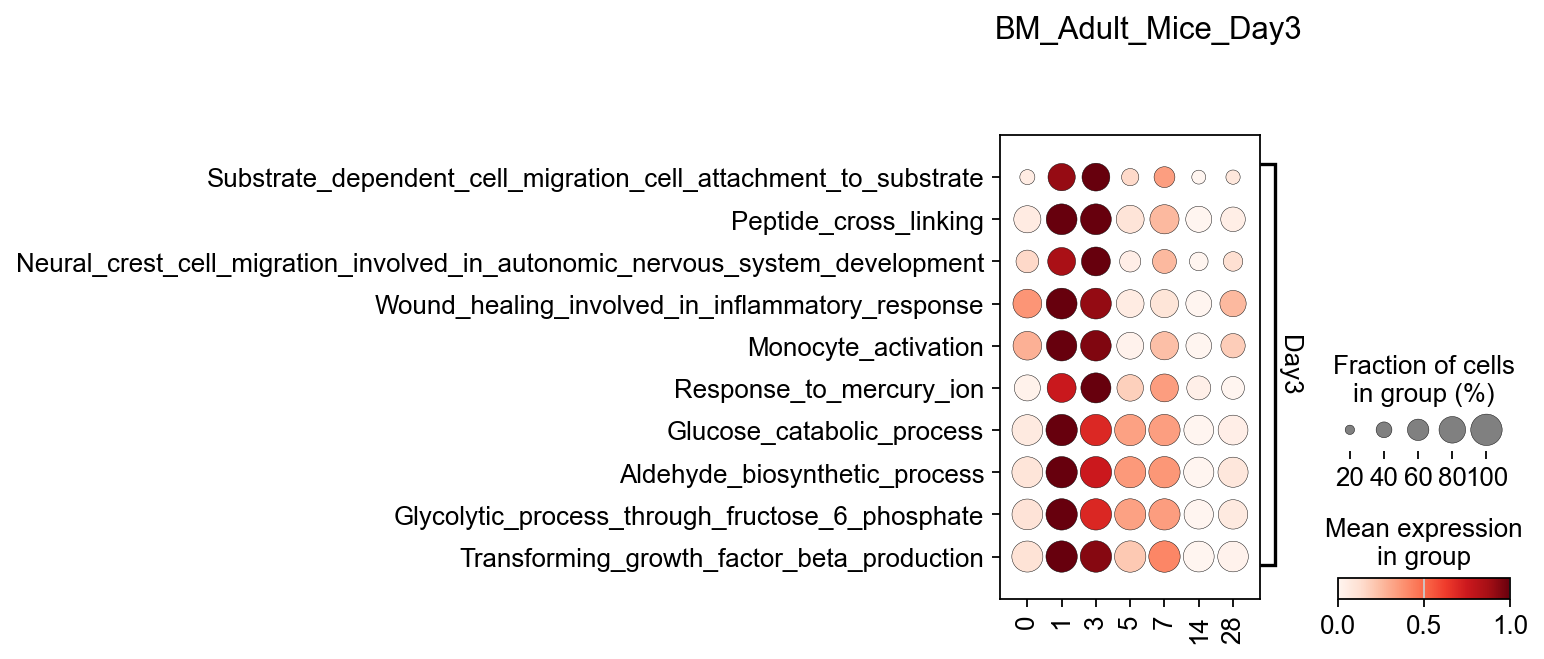

In [290]:
samp= 'BM_Adult_Mice'
toplot = 'Day3'
toplots = eval(toplot+'_mouse') if samp=='BM_Adult_Mice' else eval(toplot+'_ZF')
ordered = ''
groupby = 'Day'
#breakgroup = 'FinalCT'
full = ''

if len(ordered)>0: 
    toplots = Gordered_mouse if samp=='Adult_Mice' else Gordered_ZF
adataA = eval(samp).copy()
adataA.var_names = [x.split('GOBP_')[1].capitalize() for x in adataA.var_names]

#breaks = break_mouse if samp=='Adult_Mice' else break_ZF
breaks2 = [x*2 for x in list(range(1,len(adataA.obs[breakgroup].cat.categories)))]

fig = sc.pl.dotplot(adataA,groupby=groupby,var_names=toplots,title=f'{samp}_{toplot}',return_fig = True,
                 standard_scale='var',swap_axes=True,dot_max=1)
ax = fig.get_axes()['mainplot_ax']
if groupby=='Day_Study':
    ax.vlines(breaks,0,len(toplots),linestyles='--')

if groupby=='CT_Condition':
    if toplot.startswith('M1M2'):
        ax.vlines(breaks2,0,len(toplots['M1'])+len(toplots['M2']),linestyles='--')
    elif toplot.startswith('TRM'):
        ax.vlines(breaks2,0,len(toplots['TRM']),linestyles='--')
    else:
        ax.vlines(breaks2,0,len(toplots),linestyles='--')

plt.savefig(f'./figures/{samp}_{toplot}{full}_{groupby}{ordered}.pdf',bbox_inches='tight')